## Observations and Insights 

In [174]:
%matplotlib inline
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_df = mouse_metadata.rename(columns={'Mouse ID':'mouse_id','Drug Regimen':'drug_regimen','Sex':'sex','Age_months':'age_months','Weight (g)':'weight'})
study_df = study_results.rename(columns={'Mouse ID':'mouse_id','Timepoint':'timepoint','Tumor Volume (mm3)':'tumor_volume','Metastatic Sites':'metastatic_sites'})
study_df.head()
#study_results['Mouse ID'].nunique()
#study_results.nunique()

,mouse_id,timepoint,tumor_volume,metastatic_sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [175]:
# Combine the data into a single dataset
df = pd.merge(mouse_df, study_df, how="left", on=["mouse_id", "mouse_id"])
df.head()
# Display the data table for preview

,mouse_id,drug_regimen,sex,age_months,weight,timepoint,tumor_volume,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [176]:
# Checking the number of mice.
df.count()

mouse_id            1893
drug_regimen        1893
sex                 1893
age_months          1893
weight              1893
timepoint           1893
tumor_volume        1893
metastatic_sites    1893
dtype: int64

In [177]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#ids = df["mouse_id","timepoint"]
#df[ids.isin(ids[ids.duplicated()])]

results = df.groupby(["mouse_id","timepoint"]).size()
results = results[results > 1]
results

mouse_id  timepoint
g989      0            2
          5            2
          10           2
          15           2
          20           2
dtype: int64

In [178]:
df.describe()
#df.to_csv(r'data/merge_dataset.csv', index = False)
#df.head()

,age_months,weight,timepoint,tumor_volume,metastatic_sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [179]:
# Optional: Get all the data for the duplicate mouse ID. 
#df = df[study_df.duplicated(subset=['mouse_id','timepoint'], keep=False)]
#print (df)
#df.value_counts(subset=['mouse_id','timepoint'],normalize=True)

In [180]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.drop_duplicates(subset=['mouse_id','timepoint'])
#clean_df.to_csv(r'data/merge_dataset.csv', index = False)
#df.head()

In [181]:
clean_df.describe()

,age_months,weight,timepoint,tumor_volume,metastatic_sites
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,12.792903,25.661547,19.597458,50.449276,1.023835
std,7.186737,3.926776,14.084762,8.904565,1.138507
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951421,1.000000
75%,20.000000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [116]:
clean_df.head()

,mouse_id,drug_regimen,sex,age_months,weight,timepoint,tumor_volume,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [182]:
# Checking the number of mice in the clean DataFrame.
df['mouse_id'].nunique()

249

## Summary Statistics

In [183]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#sum_df = clean_df.groupby(['drug_regimen','tumor_volume'])
sum_df = clean_df.groupby(['drug_regimen'])
sum_df.head(10)

,mouse_id,drug_regimen,sex,age_months,weight,timepoint,tumor_volume,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
692,c580,Ketapril,Male,22,25,10,47.570174,1
693,c580,Ketapril,Male,22,25,15,51.991708,1
694,c580,Ketapril,Male,22,25,20,55.575322,2
695,c580,Ketapril,Male,22,25,25,56.289062,2


In [381]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
groupcols_df = sum_df[['mouse_id','drug_regimen','tumor_volume']].agg({'tumor_volume':['mean','median','var','std','sem']})
groupcols_df

tumor_volume                                          
                     mean     median        var       std       sem
drug_regimen                                                       
Capomulin       40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin        52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol       52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril        55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol        54.331565  52.509285  66.173479  8.134708  0.596466
Placebo         54.033581  52.288934  61.168083  7.821003  0.581331
Propriva        52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane        40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn        54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol       53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [185]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
msum_df = sum_df['mouse_id'].count()
msum = msum_df.reset_index()
msum

,drug_regimen,mouse_id
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


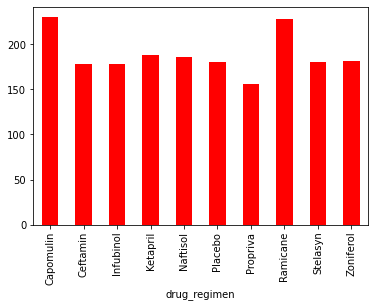

In [186]:
plotit = msum_df
plotit.plot(kind="bar", facecolor="red");
#msum

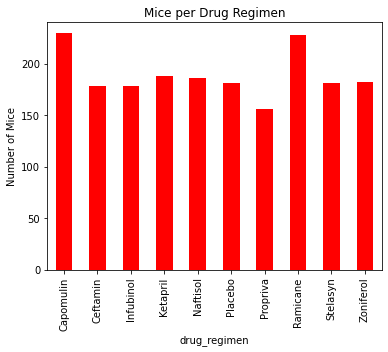

In [187]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
msum2 = msum['drug_regimen'].tolist()
x_axis = np.arange(1,len(msum2) + 1)
tick_locations = [value for value in x_axis]
plt.figure(figsize=(5.5,5))
plt.bar(x_axis, msum['mouse_id'], color="r", width=.5, align="center")
plt.xticks(tick_locations, msum2, rotation="vertical")
plt.xlim(.5, len(x_axis) + .5)
plt.ylim(0, max(msum['mouse_id'])+10)
plt.title("Mice per Drug Regimen")
plt.xlabel("drug_regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()
plt.show()

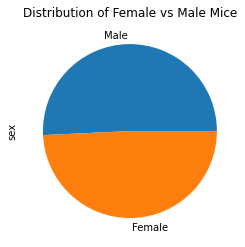

In [188]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#sex_df = clean_df.groupby(['sex'])
sex_m = clean_df['sex'].value_counts()
sex_m.plot(kind="pie",title="Distribution of Female vs Male Mice");

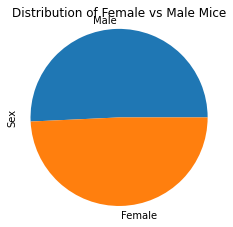

In [386]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Sex")
#plt.pie(sex_m,  labels="sex",autopct="%1.1f%%"),  startangle=90)
plt.pie(sex_m,  labels=['Male','Female'],radius=0.2) #,  startangle=90)
plt.axis("equal")
#plt.pie(sex_m,  autopct="%1.1f%%") #,  startangle=90)
fig = plt.gcf()
fig.set_size_inches(3.5,3.5) # Sizing
plt.show()


## Quartiles, Outliers and Boxplots

In [190]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxtp_df = study_df.groupby('mouse_id').max('tumor_volume')
maxtp_df

,timepoint,tumor_volume,metastatic_sites
mouse_id,,,
a203,45,67.973419,2
a251,45,65.525743,1
a262,45,70.717621,4
a275,45,62.999356,3
a366,30,63.440686,1
...,...,...,...
z435,10,48.710661,0
z578,45,45.000000,0
z581,45,62.754451,3


In [191]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tvlt_df = pd.merge(mouse_df, maxtp_df, how="left", on=["mouse_id", "mouse_id"])
tvlt_df

,mouse_id,drug_regimen,sex,age_months,weight,timepoint,tumor_volume,metastatic_sites
0,k403,Ramicane,Male,21,16,45,45.000000,1
1,s185,Capomulin,Female,3,17,45,45.000000,1
2,x401,Capomulin,Female,16,15,45,45.473753,0
3,m601,Capomulin,Male,22,17,45,45.000000,1
4,g791,Ramicane,Male,11,16,45,45.851531,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [212]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#treatments = tvlt_df['drug_regimen'].unique()
treatments

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [230]:
# Create empty list to fill with tumor vol data (for plotting)

#for drug in treatments
cap_tumorvol_df = tvlt_df.loc[tvlt_df['drug_regimen'] == 'Capomulin',['tumor_volume']]
ram_tumorvol_df = tvlt_df.loc[tvlt_df['drug_regimen'] == 'Ramicane',['tumor_volume']]
inf_tumorvol_df = tvlt_df.loc[tvlt_df['drug_regimen'] == 'Infubinol',['tumor_volume']]
cef_tumorvol_df = tvlt_df.loc[tvlt_df['drug_regimen'] == 'Ceftamin',['tumor_volume']]
#ram_tumorvol = np.arange(0,len(tvlt_df[]))
#inf_tumorvol
#cef_tumorvol
cap_tumorvol = cap_tumorvol_df['tumor_volume']
ram_tumorvol = ram_tumorvol_df['tumor_volume']
inf_tumorvol = inf_tumorvol_df['tumor_volume']
cef_tumorvol = cef_tumorvol_df['tumor_volume']
cef_tumorvol

52     62.999356
65     45.000000
66     56.057749
68     55.742829
97     48.722078
111    47.784682
118    61.849023
122    68.923185
133    67.748662
134    57.918381
135    46.784535
136    59.851956
139    64.299830
155    59.741901
171    61.433892
175    64.192341
195    45.000000
199    52.925348
200    45.000000
216    67.527482
228    45.000000
232    64.634949
235    61.386660
241    68.594745
242    64.729837
Name: tumor_volume, dtype: float64

In [388]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumorvol_df = tvlt_df[['tumor_volume']]
tumorvol_df
#tvlt_df

,tumor_volume
0,45.000000
1,45.000000
2,45.473753
3,45.000000
4,45.851531
...,...
244,45.934712
245,48.710661
246,62.754451
247,65.741070


In [201]:
tumorvol = tumorvol_df['tumor_volume']
quartiles = tumorvol.quantile([.25,.5,.75])
quartiles

0.25    46.910892
0.50    55.841410
0.75    64.957562
Name: tumor_volume, dtype: float64

In [258]:
d2 = np.array((4))
centerq = np.array((2))
lowerq = np.array((2))
upperq = np.array((2))
iqr = np.array((2))
lowerq = quartiles[.25]    #flier_low
centerq = quartiles[.5]    #center
upperq = quartiles[0.75]   #flier_high
iqr = upperq-lowerq        #spread
centerq

55.84141007

In [254]:
print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")

The lower quartile of temperatures is: 46.91089166
The upper quartile of temperatures is: 64.95756185
The interquartile range of temperatures is: 18.046670190000007


In [255]:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

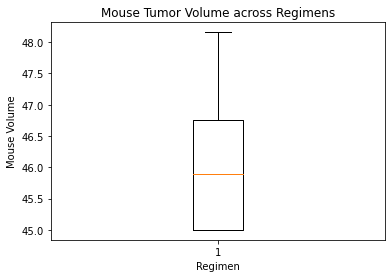

In [260]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Mouse Tumor Volume across Regimens")
ax1.set_xlabel("Regimen")
ax1.set_ylabel("Mouse Volume")
#d2 = np.concatenate((iqr, centerq, upperq, lowerq))
ax1.boxplot(cap_tumorvol)

plt.show()

## Line and Scatter Plots

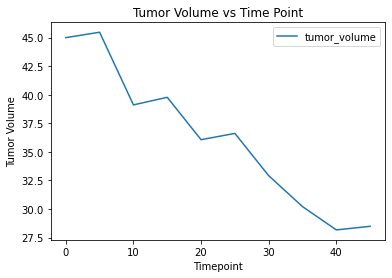

In [338]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mousedata_df = study_df.set_index('mouse_id')
mousedata_df = mousedata_df.drop(columns=['metastatic_sites'])
mousedata_df = mousedata_df.loc['x401',['tumor_volume','timepoint']]
mousedata_df.set_index('timepoint').plot(xlabel='Timepoint',ylabel='Tumor Volume',title="Tumor Volume vs Time Point");

In [373]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#tvlt_df

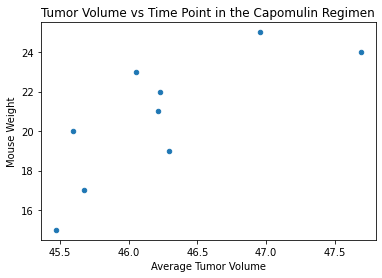

In [372]:
cap_tumorvol_df = tvlt_df.loc[tvlt_df['drug_regimen'] == 'Capomulin',['tumor_volume','weight']]
cap_tumorvol_df = cap_tumorvol_df.groupby("weight")

cap_plot = cap_tumorvol_df[["tumor_volume", "weight"]].mean()

cap_plot.plot.scatter(['tumor_volume'],['weight'],xlabel='Average Tumor Volume',ylabel='Mouse Weight',title="Tumor Volume vs Time Point in the Capomulin Regimen");

In [365]:
cap_plot #.plot.scatter()

,tumor_volume,weight
weight,,
15,45.473753,15
17,45.677564,17
19,46.291086,19
20,45.595685,20
21,46.215394,21
22,46.230278,22
23,46.052736,23
24,47.685963,24
25,46.956315,25


## Correlation and Regression

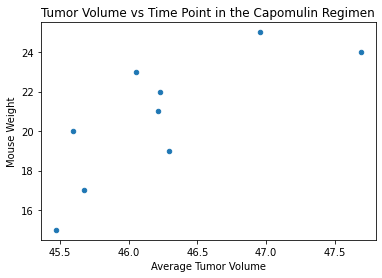

In [389]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = round(st.pearsonr(cap_plot['weight'],cap_plot['tumor_volume'])[0],2)

cap_plot.plot.scatter(['tumor_volume'],['weight'],xlabel='Average Tumor Volume',ylabel='Mouse Weight',title="Tumor Volume vs Time Point in the Capomulin Regimen");

In [393]:
# Perform a linear regression on temperature vs. latitude
x_values = cap_plot['tumor_volume']
y_values = cap_plot['weight']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 3.59x +-145.28


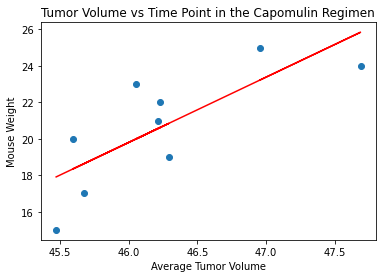

In [407]:
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)
# Create Plot
plt.scatter(x_values,y_values,)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
#xlabel='Average Tumor Volume',ylabel='Mouse Weight',title="Tumor Volume vs Time Point in the Capomulin Regimen"
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight')
plt.title('Tumor Volume vs Time Point in the Capomulin Regimen')
#plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
#print(f"The r-value is: {rvalue**2}")
#plt.figure(figsize=(12,8))
# Show plot
plt.show()